In [1]:
import os
import pandas as pd

In [2]:
import sys
sys.path.append('../src/')

%load_ext autoreload
%autoreload 2
# Importing our custom module(s)
import folds
import utils

In [3]:
'''Code to view category prevalence'''
dataset_path = '/cluster/tufts/hugheslab/eharve06/HAM10000'
df = pd.read_csv(os.path.join(dataset_path, 'metadata'))
df.dx.value_counts()/df.shape[0]

nv       0.669496
mel      0.111133
bkl      0.109735
bcc      0.051323
akiec    0.032651
vasc     0.014179
df       0.011483
Name: dx, dtype: float64

In [4]:
'''Code to create labels.csv'''
def label_to_category(label, categories):
    if label not in categories: return [0]
    else: return [categories.index(label)+1]

dataset_path = '/cluster/tufts/hugheslab/eharve06/HAM10000'
df = pd.read_csv(os.path.join(dataset_path, 'metadata'))
categories = ['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']
categories = ['bkl', 'nv', 'mel'] # categories based off prevalence
df['label'] = df['dx'].apply(lambda label: label_to_category(label, categories))
df['path'] = df['image_id'].apply(lambda image_id: os.path.join(dataset_path, 'images/{}.jpg'.format(image_id)))
temp_df = df[['lesion_id', 'label', 'path']].set_index('lesion_id')
temp_df.to_csv(os.path.join(dataset_path, 'labels.csv'))
temp_df.head()

,label,path
lesion_id,,
HAM_0000118,[1],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...
HAM_0000118,[1],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...
HAM_0002730,[1],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...
HAM_0002730,[1],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...
HAM_0001466,[1],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...


In [42]:
dataset_path = '/cluster/tufts/hugheslab/eharve06/HAM10000'
n = 100
augmented_train_dataset, train_dataset, val_or_test_dataset = utils.get_ham10000_datasets(dataset_path, n, tune=True, random_state=1001)

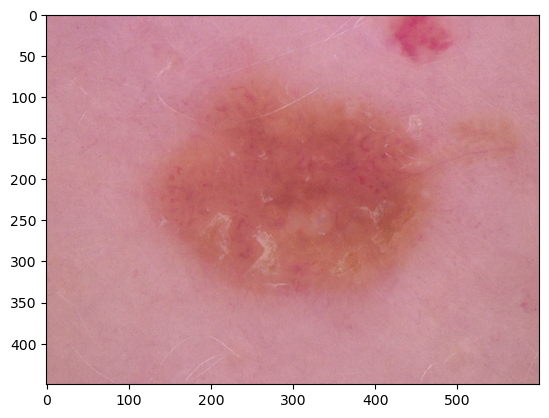

In [44]:
import matplotlib.pyplot as plt
import torch
image = torch.permute(augmented_train_dataset[0][0], (1,2,0)).numpy()
plt.imshow(image)
plt.show()

In [24]:
train_df

,label,path,Fold
0,[1],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...,5
1,[2],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...,1
2,[0],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...,5
3,[1],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...,1
4,[2],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...,1
...,...,...,...
797,[2],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...,3
798,[1],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...,6
799,[2],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...,3
800,[2],/cluster/tufts/hugheslab/eharve06/HAM10000/ima...,5
